In [139]:
import os
import pandas as pd
import numpy as np
import json
import isodate
import matplotlib.pyplot as plt

# import google_auth_oauthlib.flow
from googleapiclient.discovery import build
import googleapiclient.errors

scopes = ["https://www.googleapis.com/auth/youtube.readonly"]

In [140]:
api_key = ""

In [141]:
video_ids = ["j4KvrAUjn6c"]

In [142]:
api_service_name = "youtube"
api_version = "v3"

youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [143]:
request = youtube.videos().list(
    part="snippet,contentDetails,statistics",
    id=','.join(video_ids)
)
response = request.execute()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "etag": "ng3bn2FefzsTdW5dQm8h63v43Ec",
    "items": [
        {
            "contentDetails": {
                "caption": "false",
                "contentRating": {},
                "definition": "hd",
                "dimension": "2d",
                "duration": "PT10M20S",
                "licensedContent": true,
                "projection": "rectangular"
            },
            "etag": "nLb6xiz5aodhVCD5a6qh7Ws9QEQ",
            "id": "j4KvrAUjn6c",
            "kind": "youtube#video",
            "snippet": {
                "categoryId": "24",
                "channelId": "UCwD4x63A9KC7Si2RuSfg-SA",
                "channelTitle": "Lucas and Marcus",
                "defaultAudioLanguage": "en-US",
                "description": "BEST MOM EVER! \n\n\ud83d\udc49\ud83c\udffc NEW DOBRE BROTHER ACTION FIGURES OUT NOW!!\nhttps://youtooz.com/collections/dobre-brothers \n\nWANT A PERSONAL SHOUTOUT FROM US?! BOOK US ON CAMEO!\nhttps://www.cameo.com/dobretwins\n\n\ud83d\udcf1T

In [144]:
video_id_20 = ["j4KvrAUjn6c","8h--kFui1JA", "r-3iathMo7o", "MAjY8mCTXWk", "t4pRQ0jn23Q", "QBL8IRJ5yHU", "iILJvqrAQ_w", "NBSAQenU2Bk", "vjSohj-Iclc", "ulNswX3If6U","mdWcaWBxxcY", "YI3tsmFsrOg", "2PH7dK6SLC8","UfKmSfgFxi8","6S9c5nnDd_s","WIV3xNz8NoM", "0zZ0Y_UZRBw", "nRc0kmOYgzQ","BspHjvU11y4","6SuMbFuKDf8"]

In [145]:
api_service_name = "youtube"
api_version = "v3"

youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [146]:
def get_video_details(youtube, video_id_20):
    all_video_info = []

    request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        id=','.join(video_id_20))

    response = request.execute()

    for video in response["items"]:
        stats_to_keep = {"contentDetails": ["duration"], "snippet": ["categoryId","channelTitle"]}
        # stats_to_keep = {"contentDetails": video["duration"], "snippet": video["categoryId","channelTitle"]}
        video_info = {}
        video_info["video_id"] = video["id"]
    
        for k in stats_to_keep.keys():
            for v in stats_to_keep[k]:
                try:
                    video_info[v]=video[k][v]
                except:
                    video_info[v] = None
        all_video_info.append(video_info)
    
    return(pd.DataFrame(all_video_info)) 


In [147]:
video_df = get_video_details(youtube, video_id_20 )
video_df

,video_id,duration,categoryId,channelTitle
0,j4KvrAUjn6c,PT10M20S,24,Lucas and Marcus
1,8h--kFui1JA,PT3M51S,10,SamSmithVEVO
2,r-3iathMo7o,PT7M5S,28,Unbox Therapy
3,MAjY8mCTXWk,PT4M11S,10,周杰倫 Jay Chou
4,t4pRQ0jn23Q,PT6M32S,24,Complex
5,QBL8IRJ5yHU,PT27M35S,26,grav3yardgirl
6,iILJvqrAQ_w,PT4M24S,10,Charlie Puth
7,NBSAQenU2Bk,PT2M27S,1,Rooster Teeth
8,vjSohj-Iclc,PT34S,28,Boston Dynamics
9,ulNswX3If6U,PT3M28S,1,Selena Gomez


In [148]:
duration_seconds_list = []
for video in video_df['duration']:
    dur = isodate.parse_duration(video)
    dur_seconds = dur.total_seconds()
    duration_seconds_list.append(dur_seconds)
# Saving it to a column in the dataframe
video_df['duration_seconds'] = duration_seconds_list
video_df

,video_id,duration,categoryId,channelTitle,duration_seconds
0,j4KvrAUjn6c,PT10M20S,24,Lucas and Marcus,620.0
1,8h--kFui1JA,PT3M51S,10,SamSmithVEVO,231.0
2,r-3iathMo7o,PT7M5S,28,Unbox Therapy,425.0
3,MAjY8mCTXWk,PT4M11S,10,周杰倫 Jay Chou,251.0
4,t4pRQ0jn23Q,PT6M32S,24,Complex,392.0
5,QBL8IRJ5yHU,PT27M35S,26,grav3yardgirl,1655.0
6,iILJvqrAQ_w,PT4M24S,10,Charlie Puth,264.0
7,NBSAQenU2Bk,PT2M27S,1,Rooster Teeth,147.0
8,vjSohj-Iclc,PT34S,28,Boston Dynamics,34.0
9,ulNswX3If6U,PT3M28S,1,Selena Gomez,208.0


In [149]:
video_df["duration_seconds"].describe()

count      20.000000
mean      350.950000
std       353.122384
min        26.000000
25%       196.250000
50%       231.500000
75%       426.000000
max      1655.000000
Name: duration_seconds, dtype: float64

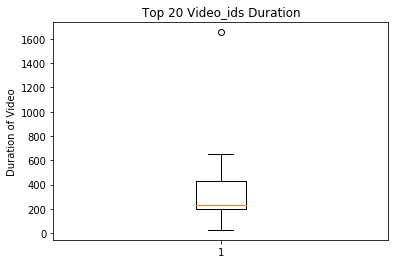

In [150]:
times = video_df["duration_seconds"]
fig1, ax1 = plt.subplots()
ax1.set_title("Top 20 Video_ids Duration")
ax1.set_ylabel("Duration of Video")
ax1.boxplot(times)
plt.show()

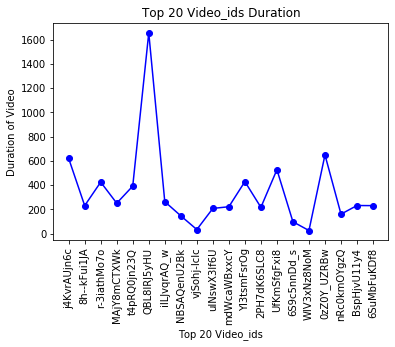

In [151]:
x_axis = video_df["video_id"]
y_axis = video_df["duration_seconds"]
plt.plot(x_axis,y_axis,marker='o', color='blue')
plt.xticks(rotation='vertical')
plt.xlabel("Top 20 Video_ids")
plt.ylabel("Duration of Video")
plt.title("Top 20 Video_ids Duration")
plt.gcf
plt.show()

In [152]:
reduced_video_df = video_df.loc[(video_df['duration_seconds'] < 800)]
reduced_video_df

,video_id,duration,categoryId,channelTitle,duration_seconds
0,j4KvrAUjn6c,PT10M20S,24,Lucas and Marcus,620.0
1,8h--kFui1JA,PT3M51S,10,SamSmithVEVO,231.0
2,r-3iathMo7o,PT7M5S,28,Unbox Therapy,425.0
3,MAjY8mCTXWk,PT4M11S,10,周杰倫 Jay Chou,251.0
4,t4pRQ0jn23Q,PT6M32S,24,Complex,392.0
6,iILJvqrAQ_w,PT4M24S,10,Charlie Puth,264.0
7,NBSAQenU2Bk,PT2M27S,1,Rooster Teeth,147.0
8,vjSohj-Iclc,PT34S,28,Boston Dynamics,34.0
9,ulNswX3If6U,PT3M28S,1,Selena Gomez,208.0
10,mdWcaWBxxcY,PT3M42S,24,Rita Ora,222.0


In [153]:
reduced_video_df.describe()

,duration_seconds
count,19.000000
mean,282.315789
std,179.376095
min,26.000000
25%,184.500000
50%,231.000000
75%,408.500000
max,649.000000


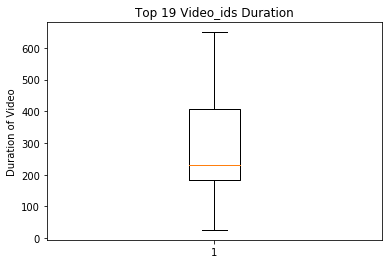

In [154]:
times = reduced_video_df["duration_seconds"]
fig1, ax1 = plt.subplots()
ax1.set_title("Top 19 Video_ids Duration")
ax1.set_ylabel("Duration of Video")
ax1.boxplot(times)
plt.show()

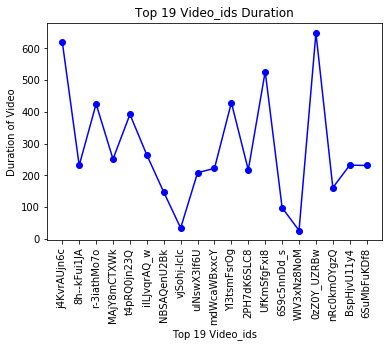

In [155]:
x_axis = reduced_video_df["video_id"]
y_axis = reduced_video_df["duration_seconds"]
plt.plot(x_axis,y_axis,marker='o', color='blue')
plt.xticks(rotation='vertical')
plt.xlabel("Top 19 Video_ids")
plt.ylabel("Duration of Video")
plt.title("Top 19 Video_ids Duration")
plt.gcf
plt.show()

In [156]:
cleaned_us_data_df = "output/cleaned_us_data.csv"

In [157]:
cleaned_us_data_df = pd.read_csv(cleaned_us_data_df)

In [158]:
video_list = cleaned_us_data_df["video_id"].unique()
video_list


array(['2kyS6SvSYSE', '1ZAPwfrtAFY', '5qpjK5DgCt4', ..., '6h8QgZF5Qu4',
       'mpnshdmtE2Y', 'yz7Xq3T0YPs'], dtype=object)

In [159]:
unique_video_list = video_list.tolist()
unique_video_list

['2kyS6SvSYSE',
 '1ZAPwfrtAFY',
 '5qpjK5DgCt4',
 'puqaWrEC7tY',
 'd380meD0W0M',
 'gHZ1Qz0KiKM',
 '39idVpFF7NQ',
 'nc99ccSXST0',
 'jr9QtXwC9vc',
 'TUmyygCMMGA',
 '9wRQljFNDW8',
 'VifQlJit6A0',
 '5E4ZBSInqUU',
 'GgVmn66oK_A',
 'TaTleo4cOs8',
 'kgaO45SyaO4',
 'ZAQs-ctOqXQ',
 'YVfyYrEmzgM',
 'eNSN6qet1kE',
 'B5HORANmzHw',
 'vU14JY3x81A',
 '6VhU_T463sU',
 '_-aDHxoblr4',
 'JBZTZZAcFTw',
 'lZ68j2J_GOM',
 'dRpNZV18N_g',
 'fcVjitaM3LY',
 'qeWvgZLz9yU',
 'iIxy3JN3-jc',
 'n30k5CwLhS4',
 'U0hAC8O7RoI',
 'CBVGjS_EJok',
 'n1WpP7iowLc',
 'hz7ukDjuq4w',
 'p2hJxyF7mok',
 '0mlNzVSJrT0',
 'Om_zGhJLZ5U',
 'e_7zHm7GsYc',
 'dQvIbulWCM4',
 'zZ9FciUx6gs',
 'PaJCFHXcWmM',
 'goP4Z5wyOlM',
 'NZFhMSgbKKM',
 '0tO_l_Ed5Rs',
 'STI2fI7sKMo',
 'BWPrk9PUwQE',
 'ogYum4kWXgk',
 'sbcbvuitiTc',
 'zNqCVTs38nU',
 'DM-ni_LSOFE',
 '0PpNlNJ6Nng',
 'c-3JxzN2u34',
 '069D0NmW39o',
 '9t9u_yPEidY',
 'KODzih-pYlU',
 '8NHA23f7LvU',
 'w0XYVssCKjw',
 '9XSULcLI6Hg',
 'pjuPpVLXDQg',
 '9xSx-5tmq44',
 '4v0nOAzcG2A',
 'oTObwUiXdYY',
 '1cgK-B

How to determine the number of values in the list above

In [160]:
api_service_name = "youtube"
api_version = "v3"

youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [161]:
duration_list=[]
    
for i in range(0, len(unique_video_list), 50):
    request = youtube.videos().list(
    part="snippet,contentDetails,statistics",
    id=unique_video_list[i:i+50]
    )
    
    try:
        data = request.execute()
 
        for video in data['items']:
            video_id = video['id']
            duration = (video['contentDetails']['duration'])
            stats_dictionary = dict(video_id=video_id, duration=''.join(duration))
            duration_list.append(stats_dictionary)
    
    except:
        pass

In [176]:
duration_list_df = pd.DataFrame(duration_list)
duration_list_df

,video_id,duration
0,2kyS6SvSYSE,PT11M18S
1,1ZAPwfrtAFY,PT23M51S
2,puqaWrEC7tY,PT7M10S
3,d380meD0W0M,PT12M13S
4,gHZ1Qz0KiKM,PT13M53S
...,...,...
5793,dS5Thrl-4Kc,PT17M6S
5794,JGm9Y_hFqNk,PT6M1S
5795,6h8QgZF5Qu4,PT8M26S
5796,mpnshdmtE2Y,PT9M10S


In [177]:
duration_seconds_total_list = []
for video in duration_list_df['duration']:
    dur = isodate.parse_duration(video)
    dur_seconds = dur.total_seconds()
    duration_seconds_total_list.append(dur_seconds)
# Saving it to a column in the dataframe
duration_list_df['duration_seconds'] = duration_seconds_total_list
duration_list_df

,video_id,duration,duration_seconds
0,2kyS6SvSYSE,PT11M18S,678.0
1,1ZAPwfrtAFY,PT23M51S,1431.0
2,puqaWrEC7tY,PT7M10S,430.0
3,d380meD0W0M,PT12M13S,733.0
4,gHZ1Qz0KiKM,PT13M53S,833.0
...,...,...,...
5793,dS5Thrl-4Kc,PT17M6S,1026.0
5794,JGm9Y_hFqNk,PT6M1S,361.0
5795,6h8QgZF5Qu4,PT8M26S,506.0
5796,mpnshdmtE2Y,PT9M10S,550.0


In [178]:
duration_list_df["duration_seconds"].describe()

count      5798.000000
mean        724.519662
std       11221.152902
min           0.000000
25%         166.000000
50%         283.000000
75%         544.750000
max      842151.000000
Name: duration_seconds, dtype: float64

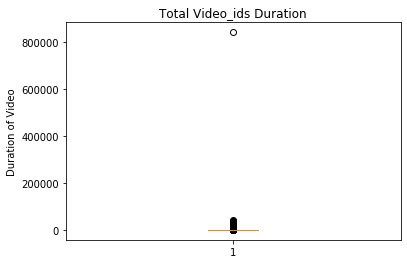

In [179]:
times = duration_list_df["duration_seconds"]
fig1, ax1 = plt.subplots()
ax1.set_title("Total Video_ids Duration")
ax1.set_ylabel("Duration of Video")
ax1.boxplot(times)
plt.show()

In [162]:
# def get_video_details(youtube, unique_video_list):
#     total_video_info = []

#     request = youtube.videos().list(
#         part="snippet,contentDetails,statistics",
#         id=','.join(unique_video_list))

#     response = request.execute()

#     for video in response["items"]:
#         stats_to_keep = {"contentDetails": ["duration"], "snippet": ["categoryId","channelTitle"]}
#         # stats_to_keep = {"contentDetails": video["duration"], "snippet": video["categoryId","channelTitle"]}
#         video_info = {}
#         video_info["video_id"] = video["id"]
    
#         for k in stats_to_keep.keys():
#             for v in stats_to_keep[k]:
#                 try:
#                     video_info[v]=video[k][v]
#                 except:
#                     video_info[v] = None
#         total_video_info.append(video_info)
    
#     return(pd.DataFrame(total_video_info)) 


In [163]:
# total_video_df = get_video_details(youtube, unique_video_list)
# total_video_df

In [164]:
# # def main():
# #     # Disable OAuthlib's HTTPS verification when running locally.
# #     # *DO NOT* leave this option enabled in production.
# #     os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"

# api_service_name = "youtube"
# api_version = "v3"
#     # client_secrets_file = "YOUR_CLIENT_SECRET_FILE.json"

#     # Get credentials and create an API client
#     # flow = google_auth_oauthlib.flow.InstalledAppFlow.from_client_secrets_file(
#     #     client_secrets_file, scopes)
#     # credentials = flow.run_console()
# youtube = build(
#     api_service_name, api_version, developerKey=api_key)

# request = youtube.channels().list(
#     part="snippet,contentDetails,statistics",
#     id=','.join(channel_ids)
# )
# response = request.execute()
# print(json.dumps(response, indent=4, sort_keys=True))

# # JSON(response)

# if __name__ == "__main__":
#     main()

In [165]:
# # Dependencies
# import requests
# import json
# import os
# from config import api_key

In [166]:
# # URL for GET requests to retrieve you tube video that trended most frequently data
# url = "https://www.googleapis.com/youtube/v3/channels"
# api_key = "&apikey=" + api_key

In [167]:
# Print the response object to the console
# print(requests.get(url))

In [168]:
# Retrieving data and converting it into JSON
# print(requests.get(url).json())

In [169]:
# Pretty Print the output of the JSON
# response = requests.get(url + "j4KvrAUjn6c" + api_key).json()
# print(json.dumps(response, indent=4, sort_keys=True))

In [170]:
# It is possible to grab a specific value 
# from within the JSON object
# print(response[""])